In [103]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df=pd.read_csv(mouse_drug_data_to_load)
clinical_df=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
drug=pd.merge(mouse_df,clinical_df, on="Mouse ID")

# Display the data table for preview
drug.head(15)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [104]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# select only columns : Drug	Timepoint	Tumor Volume (mm3)
drug_time_vol=drug[["Drug","Timepoint","Tumor Volume (mm3)"]]
# group
drug_group=drug_time_vol.groupby(["Drug","Timepoint"])

tumor_vol_mean=drug_group["Tumor Volume (mm3)"].mean()
# print(type(tumor_vol_mean))...it is a series

# Convert to DataFrame
tumor_vol_mean=pd.DataFrame(tumor_vol_mean)
tumor_vol_mean.reset_index(inplace=True)
# Preview DataFrame
tumor_vol_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [106]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vol_se=drug_group["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_vol_se=pd.DataFrame(tumor_vol_se)
tumor_vol_se.reset_index(inplace=True)
# Preview DataFrame
tumor_vol_se.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [110]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vol_mean_indextime=tumor_vol_mean.pivot(index="Timepoint",columns="Drug", values="Tumor Volume (mm3)")
# Preview that Reformatting worked
#     at the bottom of this cell

# SEM table re-format
tumor_vol_se_indextime=tumor_vol_se.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
#print(tumor_vol_se_indextime.head())

tumor_vol_mean_indextime

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


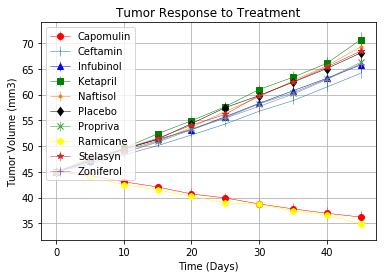

In [107]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_vol_mean_indextime.index, tumor_vol_mean_indextime["Capomulin"], yerr=tumor_vol_se_indextime["Capomulin"], color='r', marker="o",linewidth=0.5)
plt.errorbar(tumor_vol_mean_indextime.index, tumor_vol_mean_indextime["Ceftamin"], yerr=tumor_vol_se_indextime["Ceftamin"], marker=",", linewidth=0.5)
plt.errorbar(tumor_vol_mean_indextime.index, tumor_vol_mean_indextime["Infubinol"], yerr=tumor_vol_se_indextime["Infubinol"], color=
             'blue', marker="^", linewidth=0.5)
plt.errorbar(tumor_vol_mean_indextime.index, tumor_vol_mean_indextime["Ketapril"], yerr=tumor_vol_se_indextime["Ketapril"], color='green', marker="s", linewidth=0.5)
plt.errorbar(tumor_vol_mean_indextime.index, tumor_vol_mean_indextime["Naftisol"], yerr=tumor_vol_se_indextime["Naftisol"], marker=".", linewidth=0.5)
plt.errorbar(tumor_vol_mean_indextime.index, tumor_vol_mean_indextime["Placebo"], yerr=tumor_vol_se_indextime["Placebo"], color=
             'black', marker="d", linewidth=0.5)
plt.errorbar(tumor_vol_mean_indextime.index, tumor_vol_mean_indextime["Propriva"], yerr=tumor_vol_se_indextime["Propriva"], marker="x", linewidth=0.5)
plt.errorbar(tumor_vol_mean_indextime.index, tumor_vol_mean_indextime["Ramicane"], yerr=tumor_vol_se_indextime["Ramicane"], color='yellow', marker="h", linewidth=0.5)
plt.errorbar(tumor_vol_mean_indextime.index, tumor_vol_mean_indextime["Stelasyn"], yerr=tumor_vol_se_indextime["Stelasyn"], marker="*", linewidth=0.5)
plt.errorbar(tumor_vol_mean_indextime.index, tumor_vol_mean_indextime["Zoniferol"], yerr=tumor_vol_se_indextime["Zoniferol"], marker="+", linewidth=0.5)

plt.grid()
plt.legend(loc="upper left")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Save the Figure
plt.savefig("response.png")

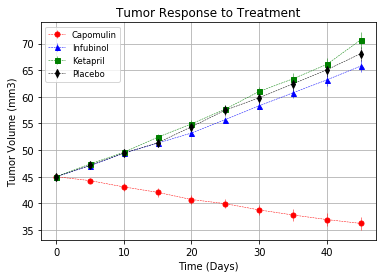

In [5]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [52]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# select columns
drug_time_meta=drug[["Drug","Timepoint","Metastatic Sites"]]
# groupby
metagroup=drug_time_meta.groupby(["Drug","Timepoint"])
# calculate mean
metagroup_mean=metagroup["Metastatic Sites"].mean()
# Convert to DataFrame
metagroup_mean=pd.DataFrame(metagroup_mean)
metagroup_mean.reset_index(inplace=True)
# Preview DataFrame
metagroup_mean.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [53]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metagroup_se=metagroup["Metastatic Sites"].sem()
# Convert to DataFrame
metagroup_se=pd.DataFrame(metagroup_se)
metagroup_se.reset_index(inplace=True)
# Preview DataFrame
metagroup_se.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [54]:
# Minor Data Munging to Re-Format the Data Frames
metagroup_mean_indextime=metagroup_mean.pivot(index="Timepoint",columns="Drug", values="Metastatic Sites")
# Preview that Reformatting worked
print(metagroup_mean_indextime.head())

# SEM table re-format
metagroup_se_indextime=metagroup_se.pivot(index="Timepoint",columns="Drug", values="Metastatic Sites")
# Preview that Reformatting worked
print(metagroup_se_indextime.head())

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.160000  0.380952   0.280000  0.304348  0.260870  0.375000   
10          0.320000  0.600000   0.666667  0.590909  0.523810  0.833333   
15          0.375000  0.789474   0.904762  0.842105  0.857143  1.250000   
20          0.652174  1.111111   1.050000  1.210526  1.150000  1.526316   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0          0.000000  0.000000  0.000000   0.000000  
5          0.320000  0.120000  0.240000   0.166667  
10         0.565217  0.250000  0.478261   0.500000  
15         0.764706  0.333333  0.782609   0.809524  
20         1.000000  0.347826  0.952381   1.294118  
Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                   

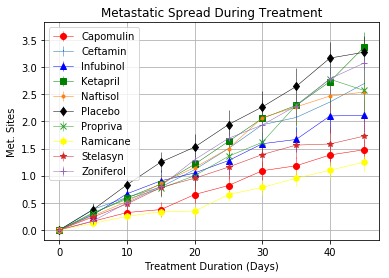

In [57]:
# Generate the Plot (with Error Bars)
plt.errorbar(metagroup_mean_indextime.index, metagroup_mean_indextime["Capomulin"], yerr=metagroup_se_indextime["Capomulin"], color='r', marker="o",linewidth=0.5)
plt.errorbar(metagroup_mean_indextime.index, metagroup_mean_indextime["Ceftamin"], yerr=metagroup_se_indextime["Ceftamin"], marker=",", linewidth=0.5)
plt.errorbar(metagroup_mean_indextime.index, metagroup_mean_indextime["Infubinol"], yerr=metagroup_se_indextime["Infubinol"], color=
             'blue', marker="^", linewidth=0.5)
plt.errorbar(metagroup_mean_indextime.index, metagroup_mean_indextime["Ketapril"], yerr=metagroup_se_indextime["Ketapril"], color='green', marker="s", linewidth=0.5)
plt.errorbar(metagroup_mean_indextime.index, metagroup_mean_indextime["Naftisol"], yerr=metagroup_se_indextime["Naftisol"], marker=".", linewidth=0.5)
plt.errorbar(metagroup_mean_indextime.index, metagroup_mean_indextime["Placebo"], yerr=metagroup_se_indextime["Placebo"], color=
             'black', marker="d", linewidth=0.5)
plt.errorbar(metagroup_mean_indextime.index, metagroup_mean_indextime["Propriva"], yerr=metagroup_se_indextime["Propriva"], marker="x", linewidth=0.5)
plt.errorbar(metagroup_mean_indextime.index, metagroup_mean_indextime["Ramicane"], yerr=metagroup_se_indextime["Ramicane"], color='yellow', marker="h", linewidth=0.5)
plt.errorbar(metagroup_mean_indextime.index, metagroup_mean_indextime["Stelasyn"], yerr=metagroup_se_indextime["Stelasyn"], marker="*", linewidth=0.5)
plt.errorbar(metagroup_mean_indextime.index, metagroup_mean_indextime["Zoniferol"], yerr=metagroup_se_indextime["Zoniferol"], marker="+", linewidth=0.5)

plt.grid()
plt.legend(loc="upper left")
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

# Save the Figure
plt.savefig("metastasis.png")

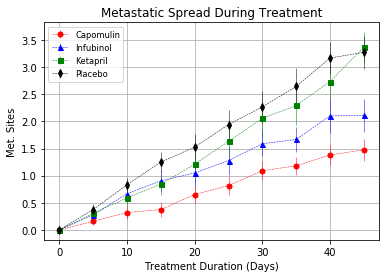

In [9]:
# Show the Figure

## Survival Rates

In [81]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# select columns
survival=drug[["Drug","Timepoint","Mouse ID"]]
# groupby
survival_group=survival.groupby(["Drug","Timepoint"])
# count
survival_count=survival_group["Mouse ID"].count()

# Convert to DataFrame
survival_count=pd.DataFrame(survival_count)
survival_count=survival_count.rename(columns={"Mouse ID":"Mouse Count"})
survival_count.reset_index(inplace=True)

# Preview DataFrame
survival_count.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [125]:
# Minor Data Munging to Re-Format the Data Frames
survival_indextime=survival_count.pivot(index="Timepoint",columns="Drug", values="Mouse Count")
# Preview the Data Frame
survival_indextime.head(15)
#type(survival_indextime)-pandas.core.frame.DataFrame

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [94]:
print(len(survival_indextime.index))
# divide each column by the number of mouse count at timepoint "0"

survival_analysis=round((survival_indextime/survival_indextime.iloc[0,]*100))
#for i in range(len(survival_indextime.index)):
#    survival_analysis=survival_indextime.iloc[:i]/survival_indextime.iloc[0,i]*100

# print(survival_analysis.dtypes)-float64
survival_analysis.head(15)

10


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.0,92.0,81.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,54.0,92.0,73.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.0,92.0,69.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.0,84.0,62.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,35.0,80.0,46.0,56.0


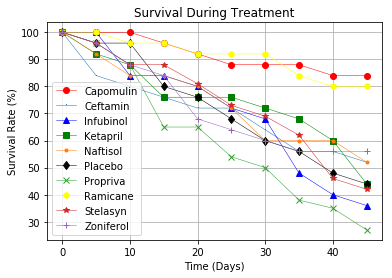

In [96]:
# Generate the Plot (Accounting for percentages)
plt.plot(survival_analysis.index, survival_analysis["Capomulin"],color='r', marker="o",linewidth=0.5)
plt.plot(survival_analysis.index, survival_analysis["Ceftamin"],marker=",", linewidth=0.5)
plt.plot(survival_analysis.index, survival_analysis["Infubinol"],color=
             'blue', marker="^", linewidth=0.5)
plt.plot(survival_analysis.index, survival_analysis["Ketapril"],color='green', marker="s", linewidth=0.5)
plt.plot(survival_analysis.index, survival_analysis["Naftisol"],marker=".", linewidth=0.5)
plt.plot(survival_analysis.index, survival_analysis["Placebo"],color=
             'black', marker="d", linewidth=0.5)
plt.plot(survival_analysis.index, survival_analysis["Propriva"],marker="x", linewidth=0.5)
plt.plot(survival_analysis.index, survival_analysis["Ramicane"],color='yellow', marker="h", linewidth=0.5)
plt.plot(survival_analysis.index, survival_analysis["Stelasyn"],marker="*", linewidth=0.5)
plt.plot(survival_analysis.index, survival_analysis["Zoniferol"],marker="+", linewidth=0.5)

plt.grid()
plt.legend(loc="best")
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# Save the Figure
plt.savefig("survival.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [123]:
print(type(tumor_vol_mean_indextime))
# Calculate the percent changes for each drug
timepoint_0=tumor_vol_mean_indextime.loc[[0],:]
timepoint_45=tumor_vol_mean_indextime.loc[[45],:]
#print(timepoint_0)
# print(timepoint_45)
change=timepoint_0-timepoint_45
change
# Display the data to confirm


TypeError: 'DataFrame' object is not callable

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

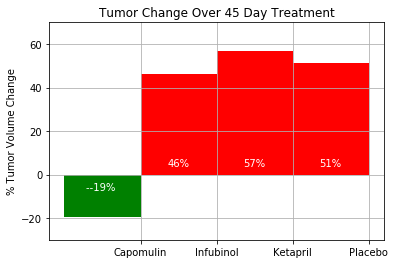